In [2]:
import pandas as pd
import numpy as np 

# Chargement des données 

In [5]:
# GeneriquesComptes = pd.read_csv("./data/CLI_GCO_GeneriquesComptes.csv", sep=";")

GeneriquesTiers = pd.read_csv("data/CLI_GTI_GeneriquesTiers.csv", sep=";",error_bad_lines=False)



C:\Users\Travaille\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
GeneriquesTiers.head()

,GTI_CodSociete,GTI_CodPrestataire,GTI_CodTiers,PaysNaissance,EW28_Libelle,civilite,GTI_NumStatutPers,GTI_DatNaissanceOuCreation,Sexe,SituationFamiliale,csp,profession,GTI_CodTypeInvestisseurMif2,GTI_CodExperienceMif2,GTI_CodCapaciteProduitComplexeMif2,DepartementResidence
0,OBP,GV1,0xEF95D701D557C772829DEA1799F993F1,NaN,NaN,Madame,0,1990.0,FEMININ,NaN,NaN,NaN,NaN,NaN,NaN,13
1,OBP,GV1,0x7DB06BECD6FD75E03E214A397AA4B717,NaN,NaN,Madame,0,1970.0,FEMININ,NaN,NaN,NaN,NaN,NaN,NaN,44
2,OBP,GV1,0x9CF059985C10E2A99077C65912980377,NaN,NaN,Monsieur,0,1940.0,Masculin,NaN,NaN,NaN,NaN,NaN,NaN,75
3,OBP,GV1,0x846F952808A6A0923BE4572E9B61902B,NaN,NaN,Madame,0,1960.0,FEMININ,NaN,NaN,NaN,NaN,NaN,NaN,95
4,OBP,GV1,0x5188CAC4E12B49220EB69C5BDD7726BF,NaN,NaN,Monsieur,0,1940.0,Masculin,NaN,NaN,NaN,NaN,NaN,NaN,83


### Suppréssion des colonnes non utilisées :

In [14]:
# Enumération des colonnes à conserver selon l'archtiecture de la Datawarehouse
conserver = [
"GTI_CodTiers",
"GTI_CodPrestataire",
"GTI_CodSociete",
"GTI_DatNaissanceOuCreation",
"civilite",
"Sexe",
"SituationFamiliale",
"csp",
"profession"
    
]

In [15]:
# Selection des colonnes à conserver dans le dataframe "GeneriquesTiers"
GeneriquesTiers = GeneriquesTiers[conserver].copy()

In [17]:
GeneriquesTiers.head()

,GTI_CodTiers,GTI_CodPrestataire,GTI_CodSociete,GTI_DatNaissanceOuCreation,civilite,Sexe,SituationFamiliale,csp,profession
0,0xEF95D701D557C772829DEA1799F993F1,GV1,OBP,1990.0,Madame,FEMININ,NaN,NaN,NaN
1,0x7DB06BECD6FD75E03E214A397AA4B717,GV1,OBP,1970.0,Madame,FEMININ,NaN,NaN,NaN
2,0x9CF059985C10E2A99077C65912980377,GV1,OBP,1940.0,Monsieur,Masculin,NaN,NaN,NaN
3,0x846F952808A6A0923BE4572E9B61902B,GV1,OBP,1960.0,Madame,FEMININ,NaN,NaN,NaN
4,0x5188CAC4E12B49220EB69C5BDD7726BF,GV1,OBP,1940.0,Monsieur,Masculin,NaN,NaN,NaN


In [18]:
# Affichage du types des variables
GeneriquesTiers.dtypes

GTI_CodTiers                   object
GTI_CodPrestataire             object
GTI_CodSociete                 object
GTI_DatNaissanceOuCreation    float64
civilite                       object
Sexe                           object
SituationFamiliale             object
csp                            object
profession                     object
dtype: object

### Nettoyage des données manquantes :

In [19]:
GeneriquesTiers.isna().sum()

GTI_CodTiers                     0
GTI_CodPrestataire               0
GTI_CodSociete                   0
GTI_DatNaissanceOuCreation     570
civilite                      1814
Sexe                             0
SituationFamiliale            6058
csp                           6046
profession                    6038
dtype: int64

Les colonnes : 

* **GTI_DatNaissanceOuCreation**
* **civilite**


Contiennent respectivement 1% et 3%  de données manquantes donc on peut supprimer les lignes manquantes car c'est des nombres faible.
Cependant , les colonnes :
* **SituationFamiliale**
* **csp**
* **profession**

contiennent plus de 11% des données manquantes, donc ce n'est pas utile de supprimer les lignes. Nous allons donc remplacer les valeurs nulles par les données aqéquates.

### Suppréssion des lignes négligable:

In [47]:
GeneriquesTiers.dropna(subset = ["GTI_DatNaissanceOuCreation", "civilite"], inplace=True)

In [48]:
# Affichage du nouveau nombre de valeurs nulles dans les lignes :
GeneriquesTiers.isna().sum()

GTI_CodTiers                     0
GTI_CodPrestataire               0
GTI_CodSociete                   0
GTI_DatNaissanceOuCreation       0
civilite                         0
Sexe                             0
SituationFamiliale            4244
csp                           4232
profession                    4224
dtype: int64

***On peut observer que le nombre de valeurs nulles a diminué d'une maniére significative , nous procédrons maintenant a l'analyse des varaibale quantitaves pour voir si on des valeurs abérantes sont présentes ou pas . ***

### Etude Quantitative :

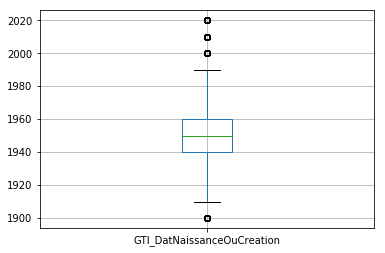

In [61]:
GeneriquesTiers.boxplot(column=["GTI_DatNaissanceOuCreation"])

***Nous Remarquons quelques points abérants qui existent (ceux qui sont > 2019 et < 1910), il faut donc supprimé quelques points***

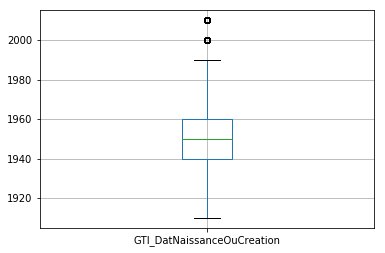

In [102]:
#csp : Salariés non cadres
#profession :NON CONNU
subset  =GeneriquesTiers[GeneriquesTiers["GTI_DatNaissanceOuCreation"] > 2019]+ GeneriquesTiers[GeneriquesTiers["GTI_DatNaissanceOuCreation"]<1910]
GeneriquesTiers=GeneriquesTiers.drop(index = subset.index)
GeneriquesTiers.boxplot(column=["GTI_DatNaissanceOuCreation"])

*** Voila une amélioration du dataset avec encore quelques point considére comme abérant (statistiquement parlant ) mais qui ne le sont pas significativement ***

## Etude qualitative :
D'aprés le dictionnaire de données qui nous a été fourni, on trouve que **SituationFamiliale**, **profession** et **csp**  s'exprime sous la forme : **_"Si (SituationFamiliale/profession/csp)décrite : description respective de la variable"_** donc si la ligne est vide pour ces colonnes, alors on replcara les valeurs nulle par :
* **_"Salariés non cadres"_** : pour csp
* **_"NON CONNU"_** : pour profession
* **_"Situation inconnue"_** : pour SituationFamiliale

In [109]:
GeneriquesTiers["SituationFamiliale"] = GeneriquesTiers["SituationFamiliale"].replace(np.nan, 'Situation inconnue', regex=True)
GeneriquesTiers["csp"] = GeneriquesTiers["csp"].replace(np.nan, 'Salariés non cadres', regex=True)
GeneriquesTiers["profession"] = GeneriquesTiers["profession"].replace(np.nan, 'NON CONNU', regex=True)

In [110]:
# Affichage du nouveau nombre de valeurs nulles dans les lignes :
GeneriquesTiers.isna().sum()

GTI_CodTiers                  0
GTI_CodPrestataire            0
GTI_CodSociete                0
GTI_DatNaissanceOuCreation    0
civilite                      0
Sexe                          0
SituationFamiliale            0
csp                           0
profession                    0
dtype: int64

* Comme nous pouvons le voir, il n'y a plus aucune valeur manquante. Voici le nouveau dataframe :

In [111]:
GeneriquesTiers.head()

,GTI_CodTiers,GTI_CodPrestataire,GTI_CodSociete,GTI_DatNaissanceOuCreation,civilite,Sexe,SituationFamiliale,csp,profession
0,0xEF95D701D557C772829DEA1799F993F1,GV1,OBP,1990.0,Madame,FEMININ,Situation inconnue,Salariés non cadres,NON CONNU
1,0x7DB06BECD6FD75E03E214A397AA4B717,GV1,OBP,1970.0,Madame,FEMININ,Situation inconnue,Salariés non cadres,NON CONNU
2,0x9CF059985C10E2A99077C65912980377,GV1,OBP,1940.0,Monsieur,Masculin,Situation inconnue,Salariés non cadres,NON CONNU
3,0x846F952808A6A0923BE4572E9B61902B,GV1,OBP,1960.0,Madame,FEMININ,Situation inconnue,Salariés non cadres,NON CONNU
4,0x5188CAC4E12B49220EB69C5BDD7726BF,GV1,OBP,1940.0,Monsieur,Masculin,Situation inconnue,Salariés non cadres,NON CONNU


* Donc on peut exporter les données en un fichier csv.

# Export des nouvelles données : 
## Attention à ne pas remplacer le fichier CLI_GCO_GeneriquesComptes.csv original.
### Remplacer le dossier de destination dans la fonction suivante on bien son nom :

In [115]:
# !!! Il faut garder le caractére 'r' au début du chemin
GeneriquesTiers.to_csv(r"./Ouput/CLI_GTI_GeneriquesTiers.csv")